In [1]:
#similar to ttv_stitcher with 2 important distinctions
#1. Getting rid of outliers for a better fit
#2. Converting x and y axis into same units

#our fit will be the sum of two sine curves, the 1st we know as the perturbation due to the F1V star (which we know information about!)
# the second being the perturbation of a potential perturbater


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

#create an array of periods and find median

periods = np.array([])
q = 7
s = 1

while q <= 15:
    s = 1
    while s <= 3:

        if q < 10:
            qs = '_q0' + str(q) + '_' + str(s)

        else:
            qs = '_q' + str(q) + '_' + str(s)

        df = pd.read_csv('KIC4150611_TTV' + qs + '/posteriors.dat', delimiter="\t \t", engine = "python")

        periods = np.append(periods,df.iloc[-3,1])

        s = s + 1

    q = q + 1

periods

array([1.43422335, 1.43425167, 1.43426235, 1.4342556 , 1.43418176,
       1.43328762, 1.4342124 , 1.43412439, 1.4341424 , 1.43422824,
       1.43462187, 1.43390944, 1.43424864, 1.43443524, 1.43397829,
       1.4332893 , 1.43395704, 1.43421773, 1.43443318, 1.43415897,
       1.43421636, 1.43434111, 1.43431021, 1.43423298, 1.43410539,
       1.43414839, 1.43421875])

In [2]:
#workout which ttv we are setting as the period and transit 0

i = 0

#note this only works for odd -> break into odd and even cases
while i < len(periods)-1:
    if periods[i] == np.median(periods):
        break

    i = i + 1

q = int(i/3) + 7
s = 1 + i%3

if q < 10:
    qs = '_q0' + str(q) + '_' + str(s)

else:
    qs = '_q' + str(q) + '_' + str(s)

df = pd.read_csv('KIC4150611_TTV' + qs + '/posteriors.dat', delimiter="\t \t", engine = "python")

P_p1 = periods[i]
t0_p1 = df.iloc[-1,1]

print(t0_p1,P_p1,qs)

1156.0856562703 1.4342177278 _q12_3


In [3]:
#create an array of estimated transit times
transit_times = np.array([])
transit_numbers = np.array([])

q07_1 = pd.read_csv('KIC4150611_TTV_q07_1/posteriors.dat', delimiter="\t \t", engine = "python")
q15_3 = pd.read_csv('KIC4150611_TTV_q15_3/posteriors.dat', delimiter="\t \t", engine = "python")

while t0_p1 > q07_1.iloc[10,1]:
    t0_p1 = t0_p1 - P_p1

transit_times = np.append(transit_times,t0_p1)

while t0_p1 < q15_3.iloc[-4,1]:
    t0_p1 = t0_p1 + P_p1
    transit_times = np.append(transit_times,t0_p1)

print(transit_times,len(transit_times))

[ 631.1619679   632.59618562  634.03040335  635.46462108  636.89883881
  638.33305653  639.76727426  641.20149199  642.63570972  644.06992745
  645.50414517  646.9383629   648.37258063  649.80679836  651.24101608
  652.67523381  654.10945154  655.54366927  656.977887    658.41210472
  659.84632245  661.28054018  662.71475791  664.14897563  665.58319336
  667.01741109  668.45162882  669.88584655  671.32006427  672.754282
  674.18849973  675.62271746  677.05693519  678.49115291  679.92537064
  681.35958837  682.7938061   684.22802382  685.66224155  687.09645928
  688.53067701  689.96489474  691.39911246  692.83333019  694.26754792
  695.70176565  697.13598337  698.5702011   700.00441883  701.43863656
  702.87285429  704.30707201  705.74128974  707.17550747  708.6097252
  710.04394292  711.47816065  712.91237838  714.34659611  715.78081384
  717.21503156  718.64924929  720.08346702  721.51768475  722.95190247
  724.3861202   725.82033793  727.25455566  728.68877339  730.12299111
  731.557

In [4]:
#aggregate other times -> compare observed times with calculated times -> if within certain range -> jot down transit number -> get an array of transit numbers

o_minus_c = np.array([])
q = 7
j = 0

while q <= 15:
    s = 1

    while s <= 3:

        if q < 10:
            qs = '_q0' + str(q) + '_' + str(s)

        else:
            qs = '_q' + str(q) + '_' + str(s)

        df = pd.read_csv('KIC4150611_TTV' + qs + '/posteriors.dat', delimiter="\t \t", engine = "python")

        i = 10

        while df.iloc[i,1] != df.iloc[-3,1]:

            while abs(df.iloc[i,1]-transit_times[j]) > 0.0375:
                j = j + 1
                print(df.iloc[i,1]-transit_times[j])

            o_minus_c = np.append(o_minus_c,24*60*60*(df.iloc[i,1]-transit_times[j]))
            transit_numbers = np.append(transit_numbers,j)
            i = i + 1

        s = s + 1

    q = q + 1

print(o_minus_c,transit_numbers)

0.006532736106464654
0.004056418606410261
0.004309532306365327
0.002969746606368062
0.016678848506330723
-0.0012722168937671086
0.002680069306165933
0.006362482906183686
0.004702738406081153
0.0029414725059950797
0.004111614106022898
0.0035454265059797763
0.002315954205869275
0.0021222155058922
0.0028625288058492515
0.0024520691057432487
0.00433669830567851
0.0036936085057277523
0.006218351005600198
0.010555736705555319
0.003285677705548551
0.005090071005497521
0.00035476670541356725
0.004068569805440347
1.4386023427053942
0.004384614905347917
-0.0014413032947686588
0.004156693405207079
0.0013825134051330679
0.005132610005148308
0.0050660404050404395
0.0025491130049886124
0.007003784504945543
0.005786987504961871
-0.0005398370950615572
0.003010016004850513
0.006027773104847256
0.00428458730470993
0.002058323804703832
0.005956712904662709
0.0008943371045688764
0.0030639796045761614
0.0028430477045731095
0.0027946934044393856
0.0025214341044375033
0.0038450026044074548
0.0041214071043214

In [5]:
while t0_p1 > q07_1.iloc[10,1]:
    t0_p1 = t0_p1 - P_p1

transit_times_exist = t0_p1+P_p1*transit_numbers

print(transit_times_exist)

[ 631.1619679   632.59618562  634.03040335  635.46462108  636.89883881
  638.33305653  639.76727426  641.20149199  642.63570972  644.06992745
  645.50414517  646.9383629   648.37258063  649.80679836  651.24101608
  652.67523381  654.10945154  655.54366927  656.977887    658.41210472
  659.84632245  661.28054018  662.71475791  664.14897563  665.58319336
  668.45162882  669.88584655  671.32006427  672.754282    674.18849973
  675.62271746  677.05693519  678.49115291  679.92537064  681.35958837
  682.7938061   684.22802382  685.66224155  687.09645928  688.53067701
  689.96489474  691.39911246  692.83333019  694.26754792  695.70176565
  697.13598337  698.5702011   700.00441883  701.43863656  702.87285429
  704.30707201  705.74128974  707.17550747  708.6097252   710.04394292
  711.47816065  712.91237838  714.34659611  715.78081384  717.21503156
  718.64924929  735.85986202  737.29407975  738.72829748  741.59673294
  743.03095066  744.46516839  745.89938612  747.33360385  750.2020393
  751.6

In [6]:
print(len(transit_times_exist),len(o_minus_c))

496 496


[-1.04692746e+00  6.18424525e-02  3.55177766e+01 -4.27576295e+01
  7.01757658e-04  4.69809347e+03 -3.00194692e-02]


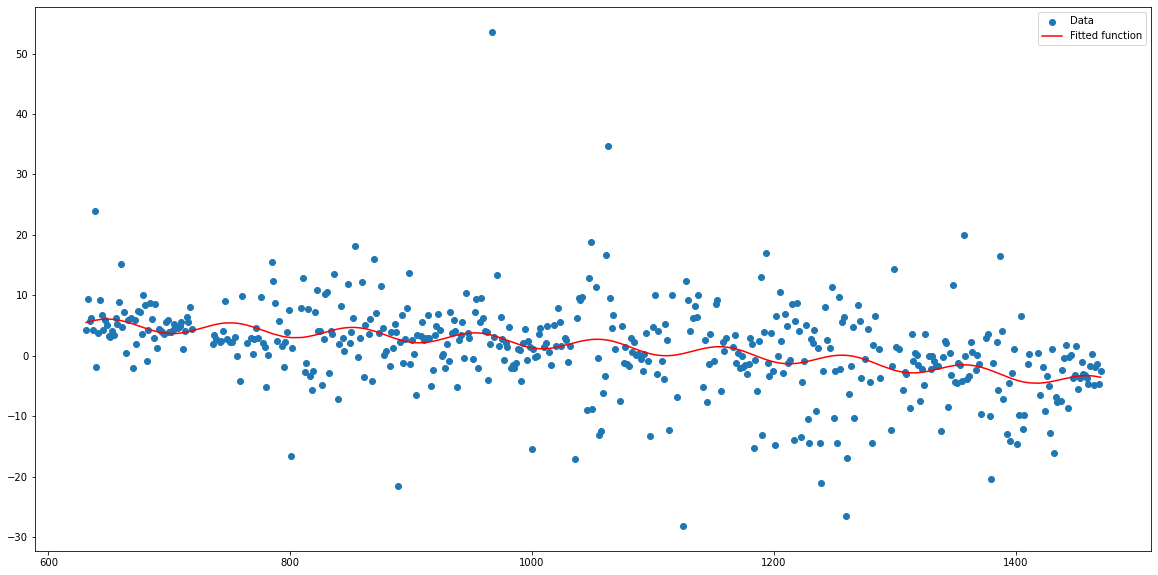

In [11]:
def test_func(x,a,b,c,d,e,f,g):
    return a*np.sin(b*(x+c)) + d*np.sin(e*(x+f)) + g*x

params, params_covariance = optimize.curve_fit(test_func, transit_times_exist, o_minus_c, p0=[3, 2*np.pi/94.226,-50,3,2*np.pi/1000,-50,1/40])

print(params)

plt.figure(figsize=(20, 10))
plt.scatter(transit_times_exist, o_minus_c, label='Data')
plt.plot(transit_times_exist, test_func(transit_times_exist,params[0], params[1],params[2], params[3], params[4],params[5],params[6]),
         label='Fitted function',color = 'red')

plt.legend(loc='best')

plt.show()
#sine model

#long term trends


In [12]:
SE = np.sqrt(np.diag(params_covariance))

print(SE)

[4.32569614e-01 1.79770270e-03 3.22769502e+01 1.55766059e+03
 8.78947162e-03 5.12452403e+04 7.86532159e-01]


In [41]:
params_covariance

array([[ 1.87116471e-01, -2.30075596e-05,  4.68775960e-01,
        -5.51139068e+00, -4.29141965e-05,  2.68305265e+02,
        -2.62241293e-03],
       [-2.30075596e-05,  3.23173501e-06, -5.67144044e-02,
        -1.87571836e-01, -9.95534488e-07,  5.70800970e+00,
        -9.56043012e-05],
       [ 4.68775960e-01, -5.67144044e-02,  1.04180151e+03,
         2.64320866e+03,  1.38769325e-02, -7.92933068e+04,
         1.34899580e+00],
       [-5.51139066e+00, -1.87571836e-01,  2.64320866e+03,
         2.42630652e+06,  1.36868328e+01, -7.97836472e+07,
         1.22514194e+03],
       [-4.29141964e-05, -9.95534488e-07,  1.38769325e-02,
         1.36868328e+01,  7.72548114e-05, -4.50408779e+02,
         6.91043702e-03],
       [ 2.68305264e+02,  5.70800970e+00, -7.92933068e+04,
        -7.97836472e+07, -4.50408779e+02,  2.62607465e+09,
        -4.02815853e+04],
       [-2.62241291e-03, -9.56043012e-05,  1.34899580e+00,
         1.22514194e+03,  6.91043702e-03, -4.02815853e+04,
         6.1863283

In [42]:
np.mean(o_minus_c)

1.3120895443517149

In [43]:
np.std(o_minus_c)

7.3497642000798935

In [21]:
new_o_minus_c = np.array([])
new_transit_times = np.array([])

i = 0
while i < len(o_minus_c):
    if abs(o_minus_c[i]) > (np.mean(o_minus_c) + 3*np.std(o_minus_c)):
        i = i + 1
        continue

    new_o_minus_c = np.append(new_o_minus_c,o_minus_c[i])
    new_transit_times = np.append(new_transit_times,transit_times_exist[i])

    i = i + 1

print(new_o_minus_c,new_transit_times)

[ 4.25785407e+00  9.40713999e+00  5.84124279e+00  6.20572652e+00
  4.27643511e+00 -1.83199233e+00  3.85929980e+00  9.16197538e+00
  6.77194330e+00  4.23572041e+00  5.92072431e+00  5.10541417e+00
  3.33497406e+00  3.05599033e+00  4.12204148e+00  3.53097951e+00
  6.24484556e+00  5.31879625e+00  8.95442545e+00  1.52002609e+01
  4.73137590e+00  7.32970225e+00  5.10864056e-01  5.85874052e+00
  6.31384546e+00 -2.07547674e+00  5.98563850e+00  1.99081930e+00
  7.39095841e+00  7.29509818e+00  3.67072273e+00  1.00854497e+01
  8.33326201e+00 -7.77365417e-01  4.33442305e+00  8.67999327e+00
  6.16980572e+00  2.96398628e+00  8.57766658e+00  1.28784543e+00
  4.41213063e+00  4.09398869e+00  4.02435850e+00  3.63086511e+00
  5.53680375e+00  5.93482623e+00  3.97817381e+00  4.02962905e+00
  4.33204589e+00  5.27848993e+00  4.79648117e+00  4.54937717e+00
  5.01163517e+00  5.58867457e+00  1.06543498e+00  4.07420943e+00
  6.36018884e+00  5.61620434e+00  8.14958194e+00  4.42294820e+00
  2.03790888e+00  3.45752

Params: [-4.22532963e-01 -1.28311280e+02 -1.69697485e+01  1.51499753e+04
 -3.48393617e-02  3.29269634e+01]
Standard error of params_covariance: [3.87272941e-01 1.36459371e+01 3.55790636e+01 4.56104276e+02
 5.61509505e-02 5.90264483e+01]


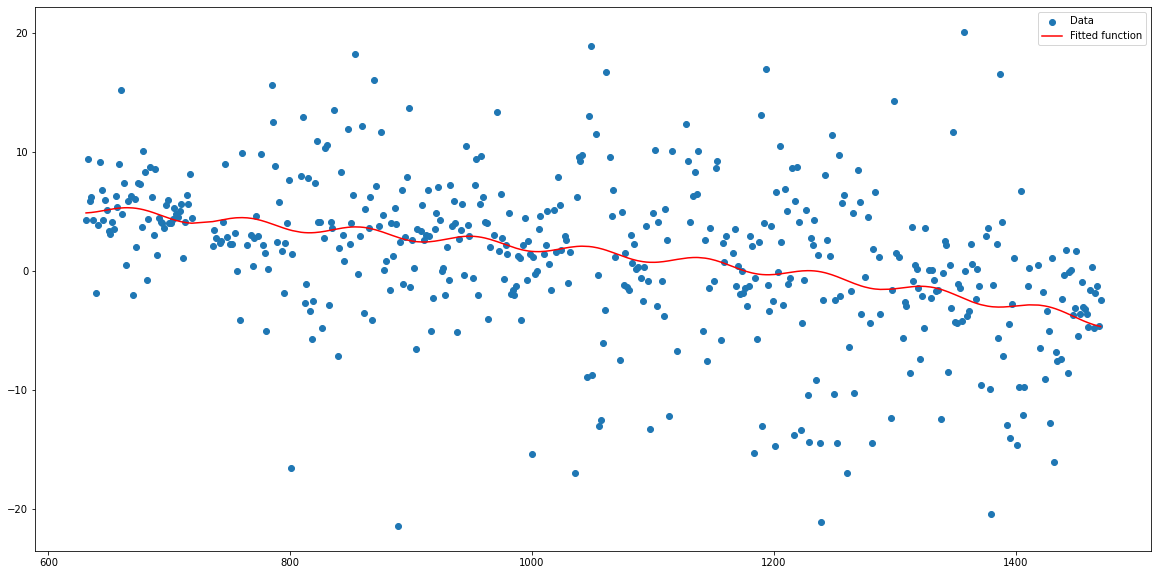

In [25]:
def test_func(x,a,c,d,f,g,h):
    return a*np.sin((2*np.pi/94.226)*(x+c)) + d*np.sin(2*np.pi*(-1/4000)*(x+f)) + g*x + h

params, params_covariance = optimize.curve_fit(test_func, new_transit_times, new_o_minus_c, p0=[0.6, -125,0.6,-125,-1/40,2],maxfev=20000)

print("Params:",params)
SE = np.sqrt(np.diag(params_covariance))

print("Standard error of params_covariance:",SE)

plt.figure(figsize=(20, 10))
plt.scatter(new_transit_times, new_o_minus_c, label='Data')
plt.plot(new_transit_times, test_func(new_transit_times,params[0], params[1],params[2], params[3], params[4],params[5]),
         label='Fitted function',color = 'red')

plt.legend(loc='best')

plt.show()

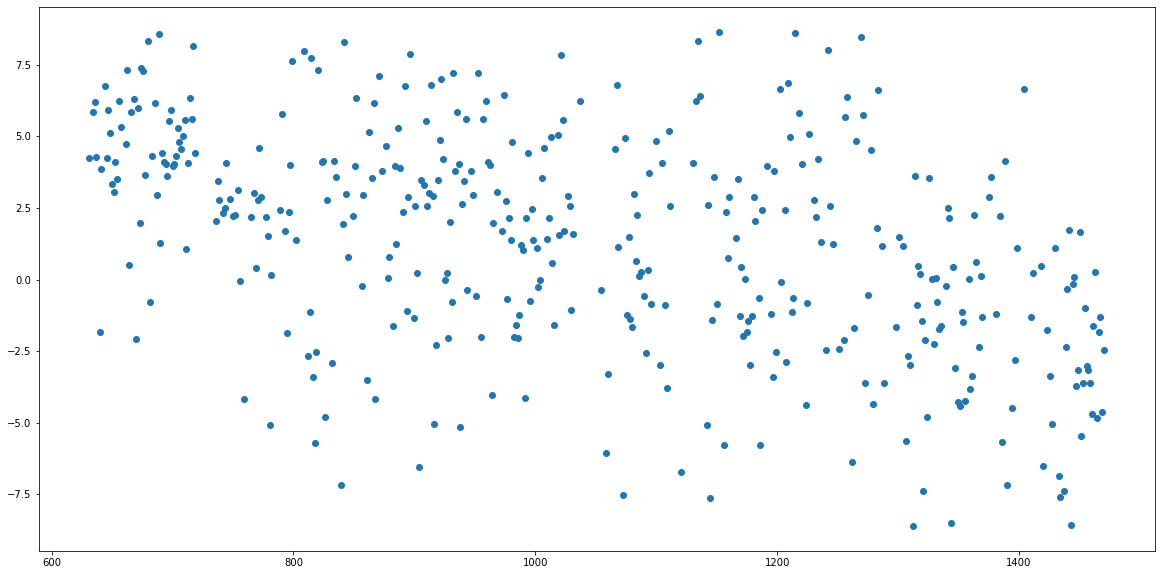

In [51]:
cplt.figure(figsize=(20, 10))
plt.scatter(new_transit_times, new_o_minus_c, label='Data')


In [77]:
print(len(new_transit_times),len(new_o_minus_c))

477 477


In [61]:
SE = np.sqrt(np.diag(params_covariance))

print(SE)

[3.82788544e-01 1.56997552e-03 2.03041940e+01 2.68696809e+00
 1.35781301e-03 9.00552764e+02]
